# Function Approximation with a Linear Model
$y=f(x)=\sin x$ <br />
Approximate this function with a linear function of the form <br />
$y = w_0 + w_1 x + w_2 x^2$ <br />
in the range $x\in(0,2\pi)$

In [0]:
import numpy as np

### Generate data

In [0]:
def fx(x):
    '''
    Input:
        x: float (scalar) or np array
    Output:
        y: float (scalar) or np array; y=f(x)=sin(x)
        
    HINT: Use web search on how to take sine in numpy
    '''
    # YOUR CODE HERE
    y = np.sin(x)
    return y

In [3]:
'''Testing'''
def test_fx():
    assert fx(0)==0
    assert np.isclose(fx(np.pi/2), 1, atol=0.001)
    assert np.isclose(fx(np.pi/4), 0.707, atol=0.001)
    print('Test passed', '\U0001F44D')
test_fx()

Test passed 👍


In [0]:
def generateX_fx(N):
    '''
    Generate N random points in the range (0,1)
    Input:
        N: int
    Outputs:
        x: np vector of shape (N,)
        y: np vector of shape (N,); y=f(x)
    '''
    # YOUR CODE HERE
    x=np.random.random(N)*2*np.pi - 2*np.pi
    yd = fx(x)
    return x, yd

In [5]:
'''Testing'''
def test_generateX_fx():
    x, yd = generateX_fx(20)
    assert x.shape[0]==20
    assert yd.shape[0]==20
    print('Test passed', '\U0001F44D')
test_generateX_fx()

Test passed 👍


### Plotting

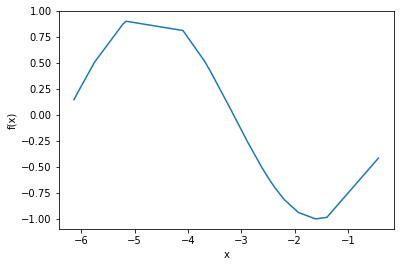

In [6]:
def plotdata():
    x, yd = generateX_fx(20)
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.plot(x[i],yd[i])
    plt.ylabel('f(x)')
    plt.xlabel('x')
plotdata()

## Training
We will now define a linear model to estimate the above function, and train it with all the data

### Define model
$y = \sum_{d=0}^D w_d x^d$, here, $D$ is the degree of the model, say D=2 <br />

In matrix representation: y = Aw <br/>

In [0]:
def createA(x, D):
    '''
    Create the matrix A with degree D
    Input:
        x: np vector of shape (N,)
        D: degree of the model
    Output:
        A: np matrix of shape (N,D+1)
    '''
    # YOUR CODE HERE
    A=[]
    for ele in x:
      curr=[]
      for i in range(D+1):
        curr.append(ele**i)
      A.append(curr)
#     print(A)
    return np.asarray(A)

In [8]:
'''Testing'''
def test_createA():
    x = np.array([1,2,3])
    A = createA(x, 2)
    assert A.shape==(3,3)
    assert np.all(A[0,:]==1)
    assert np.all(A==np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]]))
    print('Test passed', '\U0001F44D')
test_createA()

Test passed 👍


### Estimate Weights
Estimate w from yd and A. Use the least square solution you learnt in the video

In [0]:
def train_w(A, yd):
    '''
    Inputs:
        A: np matrix of shape (N,D+1)
        yd: np vector of shape (N,)
    Output:
        w: np vector of shape (D+1,)
    '''
    # YOUR CODE HERE
    yd=np.array(yd).reshape(A.shape[0],1)
#     print(yd.shape)
    w = (np.random.rand(A.shape[1],yd.shape[1])*2*np.pi - 2*np.pi)
    
    eta=0.00005
#     print(A.shape)
    for epoch in range(100):
      for i in range(A.shape[0]):
        y = (A[i].reshape(1,A.shape[1])).dot(w)
        e = (yd[i]-y) 
        w = w + eta*(A[i].reshape(A.shape[1],1)).dot(e.reshape(1,yd.shape[1]))
    return w

In [48]:
'''Testing'''
def test_train_w():
    A = np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]])
    yd = np.array([1,2,3])
    assert np.all(np.isclose(train_w(A, yd), np.array([0,1,0]), atol=.001))
    yd = yd*yd
    assert np.all(np.isclose(train_w(A, yd), np.array([0,0,1]), atol=.001))
    print('Test passed', '\U0001F44D')
test_train_w()

AssertionError: ignored

### Estimate y from the model, given x

In [0]:
def predict_y(w, x):
    '''
    Inputs:
        w: np vector of shape (D+1,)
        x: np vector of shape (N,)
    Outputs:
        y: np vector of shape (N,); y=Aw
    '''
    # YOUR CODE HERE
    A=createA(x,w.shape[0]-1)
    y=A.dot(w)
#     print(y)
    return y

In [0]:
def test_predict_y():
    w = np.array([1,2,3])
    x = np.array([0.2,0.5,0.6])
    y = predict_y(w, x)
    assert np.all(np.isclose(y, np.array([1.52, 2.75, 3.28]), atol=0.001))
    print('Test passed', '\U0001F44D')
test_predict_y()

### Estimate Error
Find E as the mean squared error

In [0]:
def compute_mse(y, yd):
    '''
    Inputs:
        y: np vector of shape (N,); y=Aw
        yd: np vector of shape (N,); yd=f(x), ie., desired or true value
    Output:
        mse: mean squared error
    '''
    # YOUR CODE HERE
    mse = ((y - yd)**2).mean()
    return mse
  

In [50]:
'''Testing'''
def test_compute_mse():
    yd = np.array([1,0,1,0])
    y = np.array([.8,.2,.8,.2])
    assert np.isclose(compute_mse(y, yd), 0.04, atol=0.003)
    print('Test passed', '\U0001F44D')
test_compute_mse()

Test passed 👍


### Plotting


In [0]:
def plotModel(x, y, yd):
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.figure()
    plt.plot(x[i],y[i],'g-o')
    plt.plot(x[i],yd[i],'r-o')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend(['estimated', 'true'])

# EXPERIMENTS
## Could you train it?
Using the above functions:
- Generate 20 training points
- Train your linear model using x and yd
- Predict y (using the linear model you found above) for the training data x
- Compare y with yd to find the mean-squared error 

In [0]:
def trainModel(N, D):
    '''
    Inputs:
        N: number of samples
        D: degree of the model
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        w: np array of size (D+1,)
        mse: scalar float
    '''
    # YOUR CODE HERE
    x,yd=generateX_fx(N)
    A=createA(x,D)
    w=train_w(A,yd)
    y=predict_y(w, x)
    mse=compute_mse(y, yd)
    return x, y, yd, w, mse

Test passed 👍


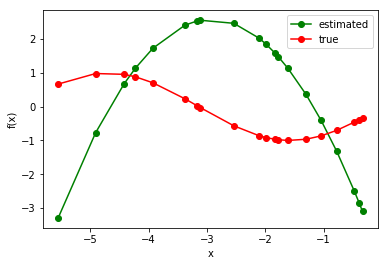

In [53]:
'''testing'''
def test_trainModel():
    N = 20
    D = 2
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==20
    assert w.shape[0]==D+1
#     print(w)
#     print('MSE on train data = ', mse)
    plotModel(x,y,yd)
    print('Test passed', '\U0001F44D')
test_trainModel()

## Could you test it on new (test) points?
Using the above functions:
- Generate 30 test points
- Estimate y using the linear model w you found above. Do NOT train again
- Compare y with yd to find the mean-squared error <br />

In [0]:
def testModel(Ntest, w):
    '''
    Inputs:
        Ntest: number of test samples to be generated
        w: np array of size (D+1,)
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        mse: scalar float
    '''
    # YOUR CODE HERE
    x,yd=generateX_fx(Ntest)
    D=w.shape[0]-1
    A=createA(x,D)
    y=predict_y(w, x)
    mse=compute_mse(y, yd)
    return x, y, yd, mse

[[-1.64385516]
 [-1.01028564]
 [-0.10289782]]
MSE on train data =  1.7955893307410307
MSE on test data =  1.023771841544
Test passed 👍


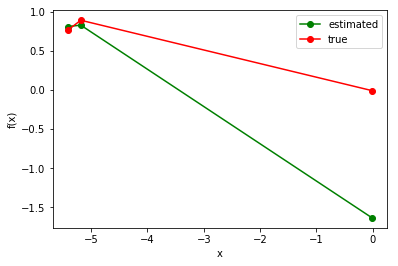

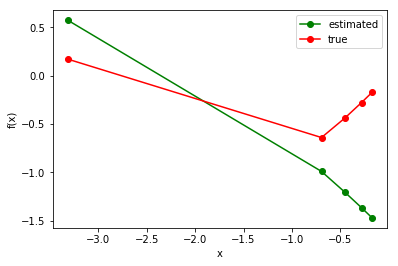

In [55]:
'''Testing'''
def test_testModel():
    N = 3
    D = 2
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==N
    assert w.shape[0]==D+1
    print(w)
    print('MSE on train data = ', mse)
    plotModel(x,y,yd)
    Ntest = 5
    x, y, yd, mse = testModel(Ntest,w)
    print('MSE on test data = ', mse)
    plotModel(x,y,yd)
    print('Test passed', '\U0001F44D')
test_testModel()

# ADVANCED

## Does the performance improve with increasing the number of training points?
- Repeat the training with different no. of samples. Take N=3, 5, 10, 30; and D=5
- Plot training error vs N
- Plot test error vs N

3
errort []
mse 13.628663029674692
et []
5
errort [13.628663029674692]
mse 14.021943353378154
et [11.936896109618788]
9
errort [13.628663029674692, 14.021943353378154]
mse 5.4528822505382175
et [11.936896109618788, 15.483696045026342]
10
errort [13.628663029674692, 14.021943353378154, 5.4528822505382175]
mse 3.085138152936285
et [11.936896109618788, 15.483696045026342, 4.8560039910426]
[13.628663029674692, 14.021943353378154, 5.4528822505382175, 3.085138152936285]


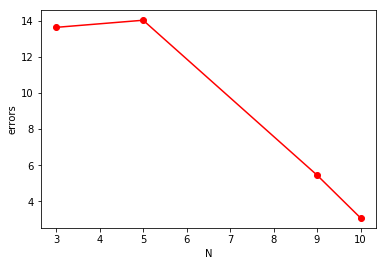

[11.936896109618788, 15.483696045026342, 4.8560039910426, 2.236297871714287]


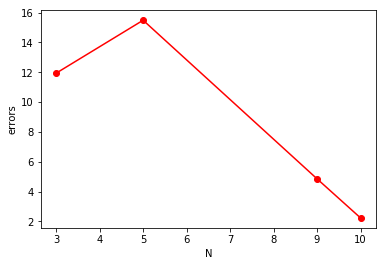

In [68]:
N=[3,5,9,10]
D=2
errorsTrain=[]
errorsTest=[]
for ele in N:
    print(ele)
    x, y, yd, w, mse=trainModel(ele, D)
    print("errort",errorsTrain)
    print("mse",mse)
    errorsTrain.append(mse)
    
    x, y, yd, mse=testModel(ele, w)
    print("et",errorsTest)
    errorsTest.append(mse)
def myplot(et):
    print(et)
    import matplotlib.pyplot as plt
    plt.plot(N,et,'r-o')
    plt.xlabel('N')
    plt.ylabel('errors')
    plt.show()
myplot(errorsTrain)
myplot(errorsTest)

## Does the performance improve with increasing the degree D of the model?
- Repeat the training with different degree models. Take D=0, 1, 2, 4, 7, 12, and N=10
- Plot training error vs D
- Plot test error vs D
- Plot y vs x for each D

()
()
()
()
()
()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in add


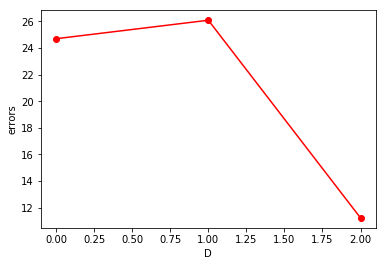

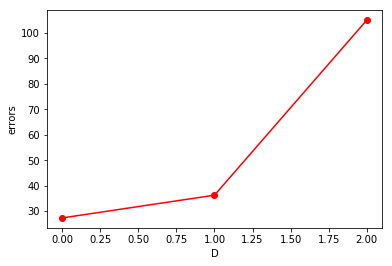

In [69]:
N=10
D=[0,1,2,4,7,12]
errorsTrain=[]
errorsTest=[]
for ele in D:
    x, y, yd, w, mse=trainModel(N,ele)
    print(np.array(mse).shape)
    errorsTrain.append(mse)
    x, y, yd, mse=testModel(N, w)
    errorsTest.append(mse)
def myplot(et):
    import matplotlib.pyplot as plt
    plt.plot(D,et,'r-o')
    plt.xlabel('D')
    plt.ylabel('errors')
    plt.show()
myplot(errorsTrain)
myplot(errorsTest)